In [94]:
import tensorflow as tf
from tensorflow import keras

In [95]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, Y_train_full), (X_test, Y_test) = fashion_mnist.load_data()

In [96]:
import matplotlib.pyplot as plt

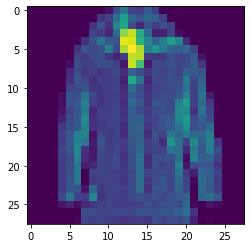

In [97]:
plt.imshow(X_train_full[19])

In [98]:
Y_train_full.shape

(60000,)

In [99]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [100]:
class_names[Y_train_full[19]]

'Coat'

In [101]:
X_train_full[19]

array([[  0,   0,   0,   0,   0,   0,   0,   2,   0,   0,  12,  55,  98,
         52,  45,  70,  47,   0,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  39,  52,  93, 144,
         83,  66,  86,  78,  48,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  35,  67,  36, 118, 151,
         60,  28,  63,  44,  60,  52,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51,  43,  29,  90, 211,
        232, 157,  90,  22,  21,  53,   9,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   2,  36,  63,  99,  70,  63, 246,
        241, 164, 116,  80, 110, 145, 117,  28,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  36,  66,  56,  63, 109,  55, 223,
        255, 225, 110, 134, 105,  79,  76,  87,  49,   0,   0,   0,   0,
          0,   0],
       [  

## Data Normalization
### Divide by 255(As we know that pixel intensities lie between 0 and 255)

In [102]:
X_train_nor = X_train_full/255.0
X_test_nor = X_test / 255.0

## Splitting into Train/Validation/Test DAtasets

In [103]:
X_valid, X_train = X_train_nor[:5000], X_train_nor[5000:]
Y_valid, Y_train = Y_train_full[:5000], Y_train_full[5000:]

In [104]:
print(
    X_valid.shape,
    Y_valid.shape,
    X_train.shape,
    Y_train.shape
)

(5000, 28, 28) (5000,) (55000, 28, 28) (55000,)


## Creating Model For Classification

In [105]:
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

In [106]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(1000, activation='relu'))
model.add(keras.layers.Dense(500, activation='relu'))
model.add(keras.layers.Dense(250, activation='relu'))
model.add(keras.layers.Dense(120, activation='relu'))
model.add(keras.layers.Dense(60, activation='relu'))
model.add(keras.layers.Dense(30, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [107]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_12 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_13 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_14 (Dense)             (None, 120)               30120     
_________________________________________________________________
dense_15 (Dense)             (None, 60)                7260      
_________________________________________________________________
dense_16 (Dense)             (None, 30)               

In [108]:
import pydot

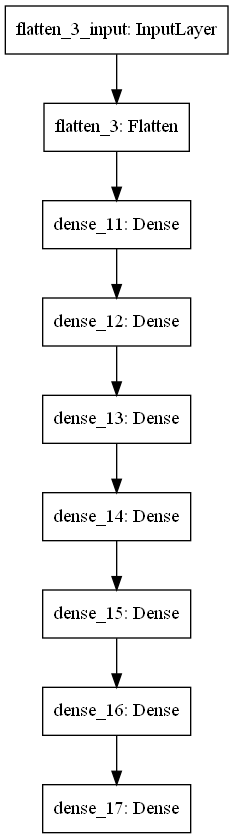

In [109]:
keras.utils.plot_model(model)

In [110]:
weights, biases = model.layers[1].get_weights()

In [111]:
weights.shape

(784, 1000)

In [112]:
biases.shape

(1000,)

In [113]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer = 'sgd',
    metrics = ['accuracy']
)

In [114]:
model_history = model.fit(X_train, Y_train, epochs=30,
validation_data=(X_valid, Y_valid))

Epoch 1/30
1719/1719 [==============================] - 16s 9ms/step - loss: 0.8197 - accuracy: 0.7141 - val_loss: 0.6945 - val_accuracy: 0.7568
Epoch 2/30
1719/1719 [==============================] - 22s 13ms/step - loss: 0.4705 - accuracy: 0.8307 - val_loss: 0.4086 - val_accuracy: 0.8554
Epoch 3/30
1719/1719 [==============================] - 20s 12ms/step - loss: 0.4022 - accuracy: 0.8544 - val_loss: 0.6833 - val_accuracy: 0.7652
Epoch 4/30
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3657 - accuracy: 0.8686 - val_loss: 0.3474 - val_accuracy: 0.8758
Epoch 5/30
1719/1719 [==============================] - 16s 10ms/step - loss: 0.3397 - accuracy: 0.8767 - val_loss: 0.3369 - val_accuracy: 0.8798
Epoch 6/30
1719/1719 [==============================] - 22s 13ms/step - loss: 0.3163 - accuracy: 0.8848 - val_loss: 0.3356 - val_accuracy: 0.8804
Epoch 7/30
1719/1719 [==============================] - 23s 13ms/step - loss: 0.3002 - accuracy: 0.8911 - val_loss: 0.3348 - v

In [115]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [116]:
model_history.history['loss']

[0.8197098970413208,
 0.47054699063301086,
 0.4022389352321625,
 0.3656862676143646,
 0.33968430757522583,
 0.3163265287876129,
 0.300182968378067,
 0.2857643663883209,
 0.27147209644317627,
 0.25999462604522705,
 0.24919921159744263,
 0.23634135723114014,
 0.22676220536231995,
 0.2170015126466751,
 0.20667792856693268,
 0.19988945126533508,
 0.19209229946136475,
 0.18424758315086365,
 0.17791645228862762,
 0.17037633061408997,
 0.16368046402931213,
 0.1572515070438385,
 0.1520160585641861,
 0.14693018794059753,
 0.13847684860229492,
 0.1359805166721344,
 0.1299939900636673,
 0.1271274834871292,
 0.12283163517713547,
 0.11537405848503113]

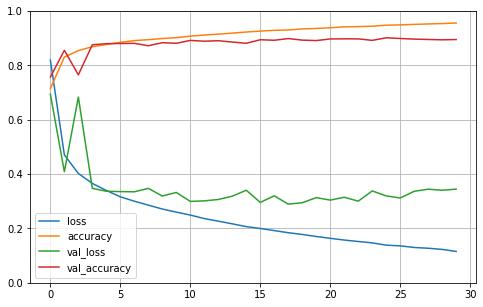

In [117]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Accuracy on Train, Test Data

In [125]:
model.evaluate(X_train, Y_train)

1719/1719 [==============================] - 7s 4ms/step - loss: 0.1143 - accuracy: 0.9555


[0.11431912332773209, 0.9555090665817261]

In [118]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 67.1165 - accuracy: 0.8411


[67.1164779663086, 0.8410999774932861]

In [119]:
X_new = X_test[:3]

In [120]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [121]:
y_pred = model.predict_classes(X_new)
y_pred

C:\Users\Dell\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1], dtype=int64)

In [122]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


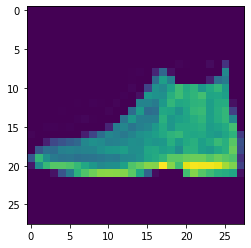

In [123]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


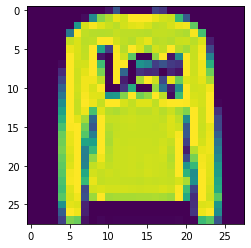

In [124]:
print(plt.imshow(X_test[1]))

In [5]:
import numpy as np
a = np.random.randn(4, 3)
b = np.random.randn(3, 2)
c = a*b
c.shape


c.shape

ValueError: operands could not be broadcast together with shapes (4,3) (3,2) 